# Home Credit Default Risk

## Data Visualization

## Muhammad Darussalam
<b>dataset:</b> Home Credit Default Risk dataset | <b>Source:</b> Kaggle

Home Credit adalah perusahaan yang dibentuk pada tahun 1997 di Republik Ceko, bergerak pada jasa pinjaman secara online dan offline yang tersebar di 9 negara salah satunya Indonesia.

dalam final project ini saya akan membuat aplikasi berbasis flask-web yang akan mengeluarkan rekomendasi apakah seseorang akan kesulitan membayar pinjaman atau lancar-lancar saja


## Import Data & Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def color():
    import random
    return ("#"+str("".join([random.choice('0123456789ABCDEF') for x in range(6)])))

def donat_plot(by,col1=plt.cm.Reds,col2=plt.cm.Blues):
    group_names=[i for i in by.groups]
    group_size=[len(by.get_group(i)) for i in by.groups]
    subgroup_names=['DEF', 'PIF']*len(list(by.groups))
    cache=[]
    for i in by.groups:
        cache_x=[]
        if len(by['TARGET'].value_counts()[i])<=1:
            if 1 not in by['TARGET'].value_counts()[i]:
                cache_x.append(0)
            else:
                cache_x.append(by['TARGET'].value_counts()[i][1])
            if 0 not in by['TARGET'].value_counts()[i]:
                cache_x.append(0)
            else:
                cache_x.append(by['TARGET'].value_counts()[i][0])
            cache.append(cache_x)
            cache_x=[]
        else:
            cache.append([by['TARGET'].value_counts()[i][1],by['TARGET'].value_counts()[i][0]])           
    a=[]
    for i in cache:
        a.append(i[0])
        a.append(i[1])
    subgroup_size=a

    col=[color() for i in range(0,len(by.groups))]

    fig, ax=plt.subplots()
    fig.set_size_inches(8, 6)
    ax.axis('equal')
    mypie,_=ax.pie(group_size,radius=1.3,labels=group_names,colors=[x for x in col])
    plt.setp(mypie,width=0.3,edgecolor='white')

    mypie2,_=ax.pie(subgroup_size,radius=1.3-0.3,labels=subgroup_names,labeldistance=0.7,colors=[x.replace('0','1') for x in col])
    plt.setp(mypie2, width=0.4,edgecolor='white')

    plt.margins(0,0)
    plt.show()

In [3]:
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv('bersih.csv')

In [5]:
data.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,1.0,25,1
1,1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,1,Core staff,2.0,45,3
2,2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,Laborers,1.0,52,0
3,3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,1,Laborers,2.0,52,8
4,4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,1,Core staff,1.0,54,8


In [4]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

## Percentage Default

Text(0.5, 1.0, 'HOME CREDIT DEFAULT')

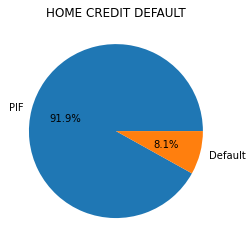

In [7]:
plt.pie(data['TARGET'].value_counts(),labels=['PIF','Default'],autopct='%1.1f%%')
plt.title('HOME CREDIT DEFAULT')

In [8]:
len(data[data['TARGET']==1])

24755

Terdapat 8.1% kredit yang mengalami kredit macet atau 24755 kredit yang mengalami kredit macet (Charge off) .

machine learning ini, diharapkan dapat memprediksi kredit macet dengan melihat profil peminjam sehingga kerugian bisa diminimalisir

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

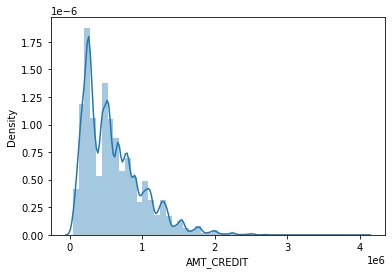

In [9]:
sns.distplot(data['AMT_CREDIT'])

In [10]:
print('Jumlah kredit macet: ', data[data['TARGET']==1]['AMT_CREDIT'].sum())
print('Jumlah kredit keseluruhan: ',data['AMT_CREDIT'].sum())
print('Rasio jumlah kredit macet terhadap keseluruhan kredit: ',round(data[data['TARGET']==1]['AMT_CREDIT'].sum()/data['AMT_CREDIT'].sum()*100,1),"%")

Jumlah kredit macet:  13806284710.5
Jumlah kredit keseluruhan:  183354653065.5
Rasio jumlah kredit macet terhadap keseluruhan kredit:  7.5 %


Text(0.5, 1.0, 'Jenis Pinjaman')

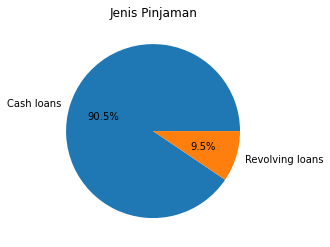

In [11]:
plt.pie(data['NAME_CONTRACT_TYPE'].value_counts(),labels=data['NAME_CONTRACT_TYPE'].value_counts().index,autopct='%1.1f%%')
plt.title('Jenis Pinjaman')

## Profile, Pekerjaan, dan Instansi


### Gender

In [12]:
bygender=data.groupby('CODE_GENDER')

Jumlah pinjaman

,CODE_GENDER,AMT_CREDIT
0,F,1.195038e+11
1,M,6.385089e+10


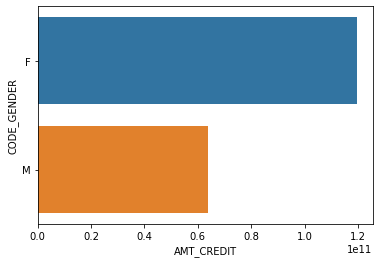

In [21]:
sns.barplot(y='CODE_GENDER', x='AMT_CREDIT', data=pd.DataFrame(bygender['AMT_CREDIT'].sum()).reset_index(),orient='h')
pd.DataFrame(bygender['AMT_CREDIT'].sum()).reset_index()

jumlah kasus

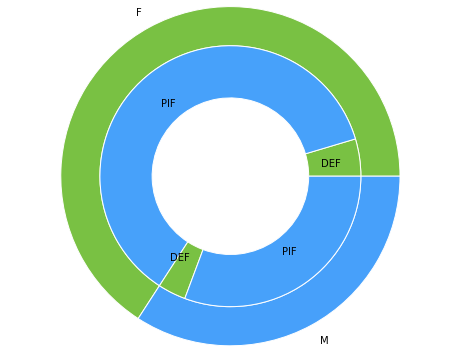

,TARGET,0,1
CODE_GENDER,,,
F,TARGET,92.995264,7.004736
M,TARGET,89.833410,10.166590


In [17]:
donat_plot(bygender)
pd.DataFrame(bygender['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

### Tingkat Pendidikan

In [18]:
byEducation=data.groupby('NAME_EDUCATION_TYPE')

Jumlah pinjaman

,NAME_EDUCATION_TYPE,AMT_CREDIT
4,Secondary / secondary special,1.242860e+11
1,Higher education,5.128221e+10
2,Incomplete higher,5.803712e+09
3,Lower secondary,1.866014e+09
0,Academic degree,1.166721e+08


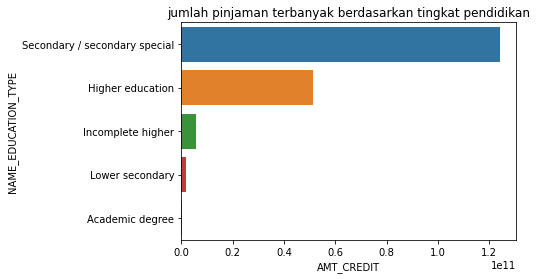

In [23]:
sns.barplot(y='NAME_EDUCATION_TYPE', x='AMT_CREDIT',data=pd.DataFrame(byEducation['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
# plt.xticks(rotation=45)
plt.title('jumlah pinjaman terbanyak berdasarkan tingkat pendidikan')
pd.DataFrame(byEducation['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)


Jumlah kasus

,TARGET,0,1
NAME_EDUCATION_TYPE,,,
Academic degree,TARGET,98.159509,1.840491
Higher education,TARGET,94.637962,5.362038
Incomplete higher,TARGET,91.503906,8.496094
Lower secondary,TARGET,89.052245,10.947755
Secondary / secondary special,TARGET,91.049228,8.950772


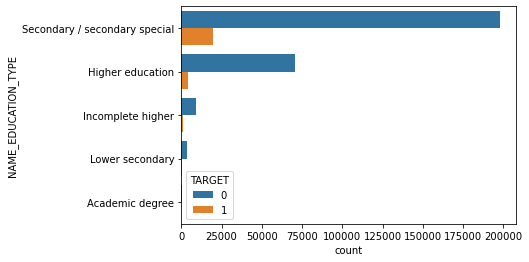

In [24]:
sns.countplot(y=data['NAME_EDUCATION_TYPE'],hue=data['TARGET'])
pd.DataFrame(byEducation['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

### Status Keluarga

In [26]:
byFamStat=data.groupby('NAME_FAMILY_STATUS')

Jumlah Pinjaman

,NAME_FAMILY_STATUS,AMT_CREDIT
1,Married,1.257538e+11
3,Single / not married,2.281688e+10
0,Civil marriage,1.604529e+10
2,Separated,1.087390e+10
4,Widow,7.864799e+09


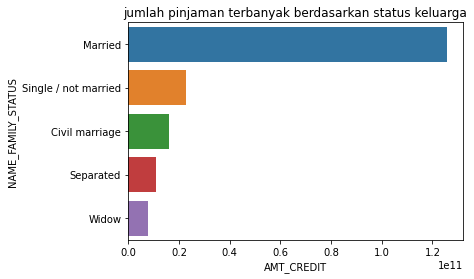

In [28]:
sns.barplot(y='NAME_FAMILY_STATUS', x='AMT_CREDIT',data=pd.DataFrame(byFamStat['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')

plt.title('jumlah pinjaman terbanyak berdasarkan status keluarga')
pd.DataFrame(byFamStat['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

Jumlah kasus

,TARGET,0,1
NAME_FAMILY_STATUS,,,
Civil marriage,TARGET,90.036415,9.963585
Married,TARGET,92.433474,7.566526
Separated,TARGET,91.794872,8.205128
Single / not married,TARGET,90.163064,9.836936
Widow,TARGET,94.161723,5.838277


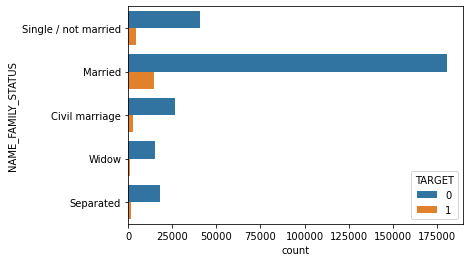

In [29]:
sns.countplot(y=data['NAME_FAMILY_STATUS'],hue=data['TARGET'])
pd.DataFrame(byFamStat['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

### Umur

In [35]:
data['age_bin']=pd.cut(data['AGE'],5)
byAge=data.groupby('age_bin')

jumlah pinjaman

,age_bin,AMT_CREDIT
2,"(39.6, 49.4]",5.014907e+10
1,"(29.8, 39.6]",4.914813e+10
3,"(49.4, 59.2]",4.389685e+10
0,"(19.951, 29.8]",2.151548e+10
4,"(59.2, 69.0]",1.864512e+10


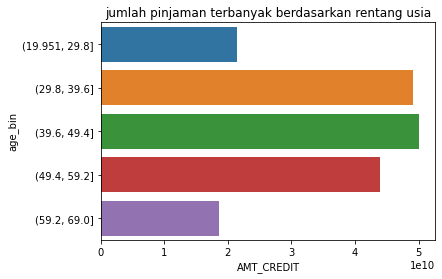

In [36]:
sns.barplot(y='age_bin', x='AMT_CREDIT',data=pd.DataFrame(byAge['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
plt.title('jumlah pinjaman terbanyak berdasarkan rentang usia')
pd.DataFrame(byAge['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

Jumlah kasus

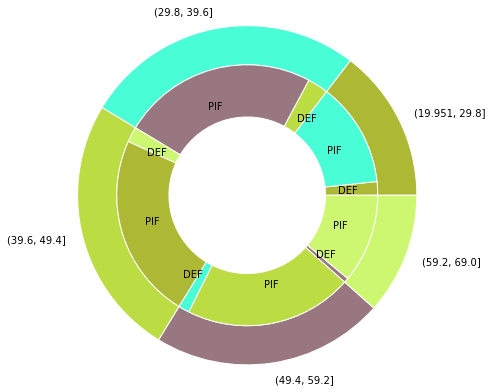

,TARGET,0,1
age_bin,,,
"(19.951, 29.8]",TARGET,88.509192,11.490808
"(29.8, 39.6]",TARGET,90.392645,9.607355
"(39.6, 49.4]",TARGET,92.340872,7.659128
"(49.4, 59.2]",TARGET,93.873430,6.126570
"(59.2, 69.0]",TARGET,95.067125,4.932875


In [38]:
donat_plot(byAge)
pd.DataFrame(byAge['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

### Kepemilikan mobil

In [39]:
byFlag_owncar = data.groupby('FLAG_OWN_CAR')

Jumlah pinjaman

,FLAG_OWN_CAR,AMT_CREDIT
0,N,1.142506e+11
1,Y,6.910404e+10


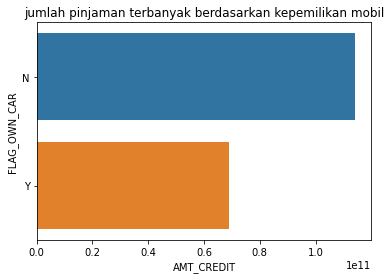

In [41]:
sns.barplot(y='FLAG_OWN_CAR', x='AMT_CREDIT',data=pd.DataFrame(byFlag_owncar['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
plt.title('jumlah pinjaman terbanyak berdasarkan kepemilikan mobil')
pd.DataFrame(byFlag_owncar['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

Jumlah kasus

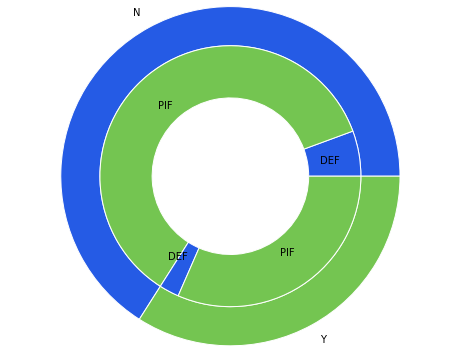

,TARGET,0,1
FLAG_OWN_CAR,,,
N,TARGET,91.489098,8.510902
Y,TARGET,92.742493,7.257507


In [42]:
donat_plot(byFlag_owncar)
pd.DataFrame(byFlag_owncar['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

### kepemilikan harta tak gerak

jumlah pinjaman

,FLAG_OWN_REALTY,AMT_CREDIT
1,Y,1.253233e+11
0,N,5.803134e+10


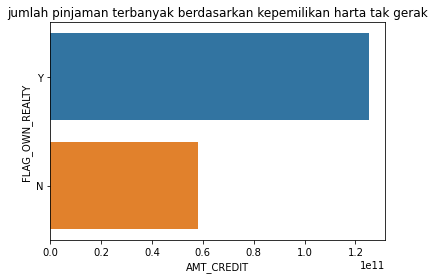

In [43]:
byFlag_ownreal = data.groupby('FLAG_OWN_REALTY')
sns.barplot(y='FLAG_OWN_REALTY', x='AMT_CREDIT',data=pd.DataFrame(byFlag_ownreal['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
plt.title('jumlah pinjaman terbanyak berdasarkan kepemilikan harta tak gerak')
pd.DataFrame(byFlag_ownreal['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

Jumlah kasus

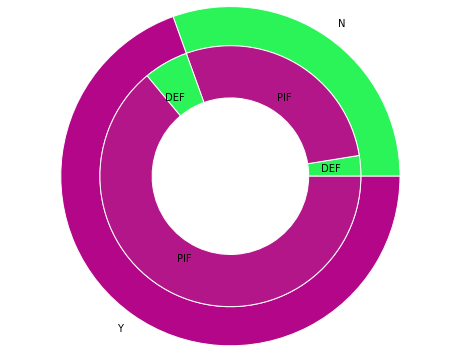

,TARGET,0,1
FLAG_OWN_REALTY,,,
N,TARGET,91.640247,8.359753
Y,TARGET,92.036234,7.963766


In [44]:
donat_plot(byFlag_ownreal)
pd.DataFrame(byFlag_ownreal['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

### Tipe Rumah

Jumlah pinjaman

,NAME_HOUSING_TYPE,AMT_CREDIT
1,House / apartment,1.643617e+11
5,With parents,7.475015e+09
2,Municipal apartment,6.687245e+09
4,Rented apartment,2.554864e+09
3,Office apartment,1.629550e+09
0,Co-op apartment,6.463004e+08


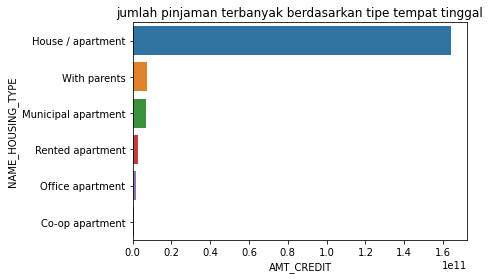

In [45]:
byHousing = data.groupby('NAME_HOUSING_TYPE')
sns.barplot(y='NAME_HOUSING_TYPE', x='AMT_CREDIT',data=pd.DataFrame(byHousing['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
plt.title('jumlah pinjaman terbanyak berdasarkan tipe tempat tinggal')
pd.DataFrame(byHousing['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

Jumlah Kasus

,TARGET,0,1
FLAG_OWN_REALTY,,,
N,TARGET,91.640247,8.359753
Y,TARGET,92.036234,7.963766


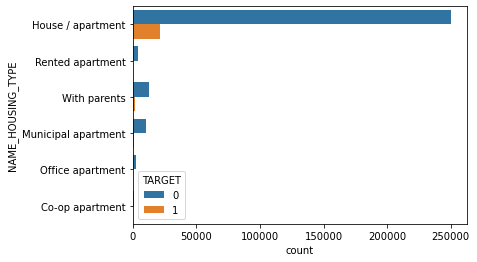

In [48]:
sns.countplot(y='NAME_HOUSING_TYPE',hue='TARGET',data=data)
pd.DataFrame(byFlag_ownreal['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

### Jumlah Anak

Jumlah Pinjaman

In [55]:
byChild=data.groupby('CNT_CHILDREN')
pd.DataFrame(byChild['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

,CNT_CHILDREN,AMT_CREDIT
0,0,1.284455e+11
1,1,3.621981e+10
2,2,1.610891e+10
3,3,2.246766e+09
4,4,2.641825e+08
5,5,4.800272e+07
6,6,1.099846e+07
7,7,3.205611e+06
13,14,2.499210e+06
9,9,1.166571e+06


Text(0.5, 1.0, 'jumlah pinjaman terbanyak berdasarkan jumlah anak')

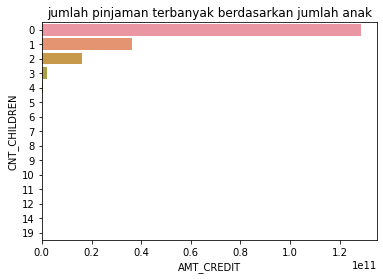

In [57]:
sns.barplot(y='CNT_CHILDREN', x='AMT_CREDIT',data=pd.DataFrame(byChild['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
plt.title('jumlah pinjaman terbanyak berdasarkan jumlah anak')

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

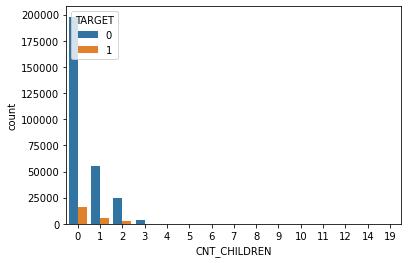

In [56]:
sns.countplot(x='CNT_CHILDREN', hue='TARGET', data=data)

In [60]:
## Stack unStack
pd.DataFrame(byChild['TARGET'].value_counts(normalize=True)).stack().unstack(1).fillna(0)

,TARGET,0,1
CNT_CHILDREN,,,
0,TARGET,0.922774,0.077226
1,TARGET,0.910655,0.089345
2,TARGET,0.912644,0.087356
3,TARGET,0.903165,0.096835
4,TARGET,0.871194,0.128806
5,TARGET,0.916667,0.083333
6,TARGET,0.714286,0.285714
7,TARGET,1.000000,0.000000
8,TARGET,1.000000,0.000000


### Distribusi cicilan terhadap income total

In [4]:
ratio_credit=data['AMT_ANNUITY']/data['AMT_INCOME_TOTAL']*100

Text(0.5, 1.0, 'rasio utang dengan pendapatan total')

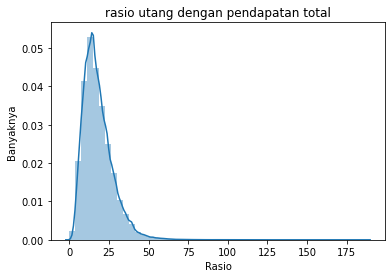

In [51]:
sns.distplot(ratio_credit)
plt.xlabel('Rasio')
plt.ylabel('Banyaknya')
plt.title('rasio utang dengan pendapatan total')

F    23
M     1
Name: CODE_GENDER, dtype: int64

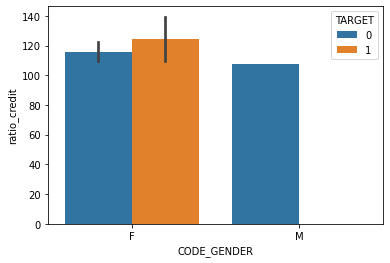

In [10]:
data['ratio_credit']=ratio_credit
sns.barplot('CODE_GENDER', 'ratio_credit',hue='TARGET',data=data[data['ratio_credit']>100])
data[data['ratio_credit']>100]['CODE_GENDER'].value_counts()

In [61]:
data['ratio_cr']=pd.cut(ratio_credit,bins=4)

,TARGET,0,1
ratio_cr,,,
"(-0.165, 46.916]",TARGET,91.911638,8.088362
"(46.916, 93.809]",TARGET,92.272727,7.727273
"(93.809, 140.703]",TARGET,91.666667,8.333333
"(140.703, 187.596]",TARGET,66.666667,33.333333


(array([0, 1, 2, 3]),
 [Text(0, 0, '(-0.165, 46.916]'),
  Text(1, 0, '(46.916, 93.809]'),
  Text(2, 0, '(93.809, 140.703]'),
  Text(3, 0, '(140.703, 187.596]')])

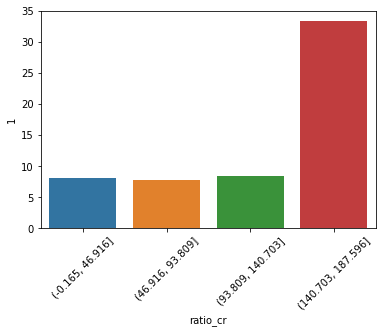

In [79]:
byCrerat=data.groupby('ratio_cr')
crerat=pd.DataFrame(byCrerat['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)
display(crerat)
sns.barplot(crerat.droplevel(1).index,crerat[1])
plt.xticks(rotation=45)

## 2. jumlah pinjaman terbanyak berdasarkan Pekerjaan dan instansi bekerja

In [80]:
byOrg=data.groupby('ORGANIZATION_TYPE')

Jumlah Pinjaman

,ORGANIZATION_TYPE,AMT_CREDIT
5,Other,5.124372e+10
1,Business Entity Type 3,4.225796e+10
10,XNA,2.997549e+10
7,Self-employed,2.253175e+10
4,Medicine,6.845622e+09
3,Government,6.367103e+09
0,Business Entity Type 2,6.247341e+09
6,School,5.487575e+09
8,Trade: type 7,4.705109e+09
2,Construction,4.280916e+09


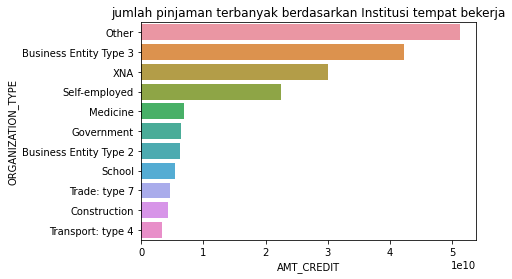

In [82]:
sns.barplot(y='ORGANIZATION_TYPE', x='AMT_CREDIT',data=pd.DataFrame(byOrg['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
plt.title('jumlah pinjaman terbanyak berdasarkan Institusi tempat bekerja')
pd.DataFrame(byOrg['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

Jumlah Kasus

,TARGET,0,1
ORGANIZATION_TYPE,,,
Business Entity Type 2,TARGET,91.493006,8.506994
Business Entity Type 3,TARGET,90.680082,9.319918
Construction,TARGET,88.284519,11.715481
Government,TARGET,92.999228,7.000772
Medicine,TARGET,93.412905,6.587095
Other,TARGET,92.100334,7.899666
School,TARGET,94.060524,5.939476
Self-employed,TARGET,89.810749,10.189251
Trade: type 7,TARGET,90.510387,9.489613


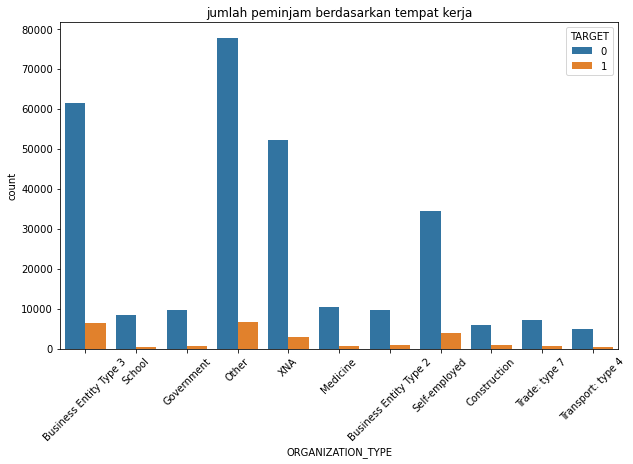

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(x='ORGANIZATION_TYPE', hue='TARGET', data=data)
plt.xticks(rotation=45)
plt.title('jumlah peminjam berdasarkan tempat kerja')
pd.DataFrame(byOrg['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

### Jenis pekerjaan

In [85]:
byOccu=data.groupby('OCCUPATION_TYPE')

,OCCUPATION_TYPE,AMT_CREDIT
8,Other,6.275791e+10
5,Laborers,3.135780e+10
9,Sales staff,1.798654e+10
2,Core staff,1.714063e+10
6,Managers,1.647145e+10
3,Drivers,1.133591e+10
4,High skill tech staff,7.282139e+09
0,Accountants,6.931285e+09
7,Medicine staff,5.165257e+09
10,Security staff,3.727099e+09


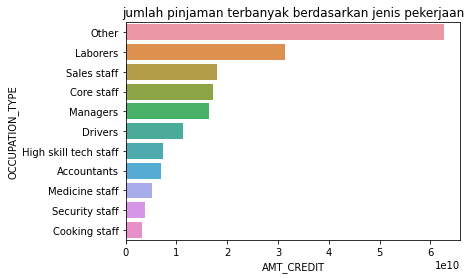

In [86]:
sns.barplot(y='OCCUPATION_TYPE', x='AMT_CREDIT',data=pd.DataFrame(byOccu['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False),orient='h')
plt.title('jumlah pinjaman terbanyak berdasarkan jenis pekerjaan')
pd.DataFrame(byOccu['AMT_CREDIT'].sum()).reset_index().sort_values('AMT_CREDIT',ascending=False)

,TARGET,0,1
OCCUPATION_TYPE,,,
Accountants,TARGET,95.147420,4.852580
Cooking staff,TARGET,89.542925,10.457075
Core staff,TARGET,93.695533,6.304467
Drivers,TARGET,88.639309,11.360691
High skill tech staff,TARGET,93.819530,6.180470
Laborers,TARGET,89.405130,10.594870
Managers,TARGET,93.786134,6.213866
Medicine staff,TARGET,93.309031,6.690969
Other,TARGET,93.071425,6.928575


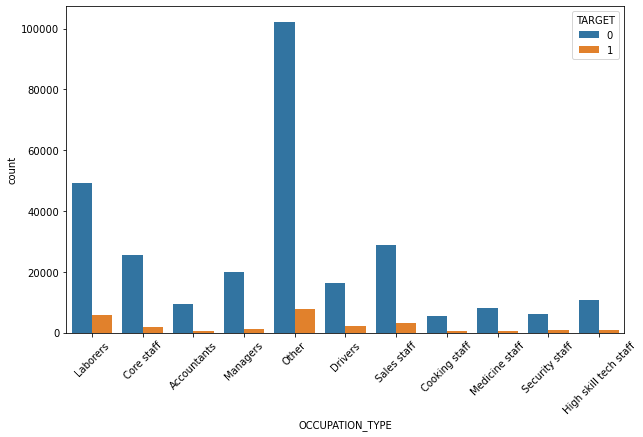

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(x='OCCUPATION_TYPE', hue='TARGET', data=data)
plt.xticks(rotation=45)
pd.DataFrame(byOccu['TARGET'].value_counts(normalize=True)*100).stack().unstack(1)

# 3. Rasio Utang

In [5]:
utang, cicilan, pemasukan, harga_barang = data['AMT_CREDIT'], data['AMT_ANNUITY'], data['AMT_INCOME_TOTAL'],data['AMT_GOODS_PRICE']

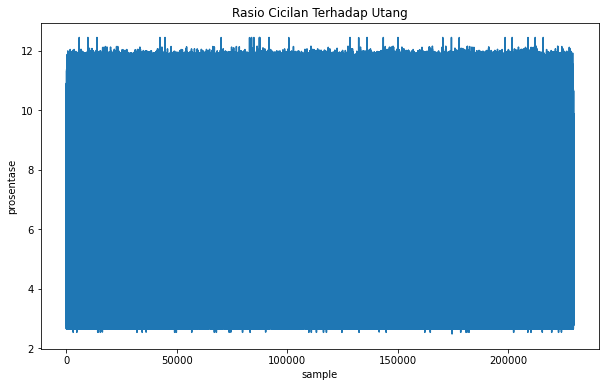

None

rasio terkecil : 2.47 %
rasio terbesar : 12.44 %


In [6]:
plt.figure(figsize=(10,6))
plt.plot(cicilan/utang*100)
plt.title('Rasio Cicilan Terhadap Utang')
plt.ylabel('prosentase')
plt.xlabel('sample')
display(plt.show())
print('rasio terkecil :', round(min(cicilan/utang*100),2),'%')
print('rasio terbesar :', round(max(cicilan/utang*100),2),'%')

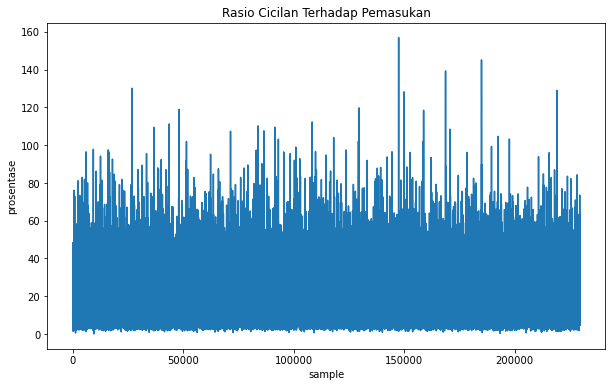

None

rasio terkecil : 0.02 %
rasio terbesar : 157.06 %


In [7]:
plt.figure(figsize=(10,6))
plt.plot(cicilan/pemasukan*100)
plt.title('Rasio Cicilan Terhadap Pemasukan')
plt.ylabel('prosentase')
plt.xlabel('sample')
display(plt.show())
print('rasio terkecil :', round(min(cicilan/pemasukan*100),2),'%')
print('rasio terbesar :', round(max(cicilan/pemasukan*100),2),'%')

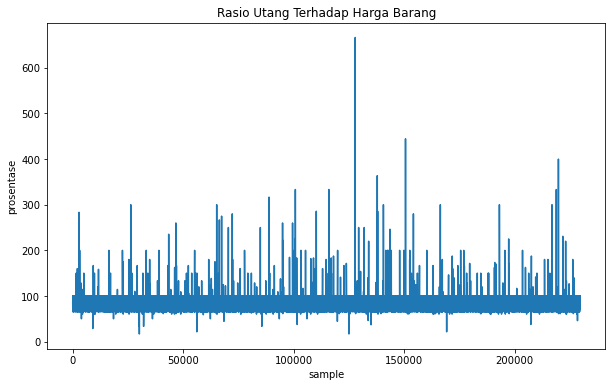

None

rasio terkecil : 16.67 %
rasio terbesar : 666.67 %


In [8]:
plt.figure(figsize=(10,6))
plt.plot(harga_barang/utang*100)
plt.title('Rasio Utang Terhadap Harga Barang')
plt.ylabel('prosentase')
plt.xlabel('sample')
display(plt.show())
print('rasio terkecil :', round(min(harga_barang/utang*100),2),'%')
print('rasio terbesar :', round(max(harga_barang/utang*100),2),'%')

<AxesSubplot:xlabel='count', ylabel='Active_CBC'>

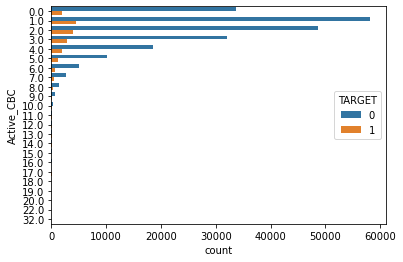

In [29]:
sns.countplot(y=data['Active_CBC'],hue=data['TARGET'])

<AxesSubplot:xlabel='count', ylabel='Refused_PA'>

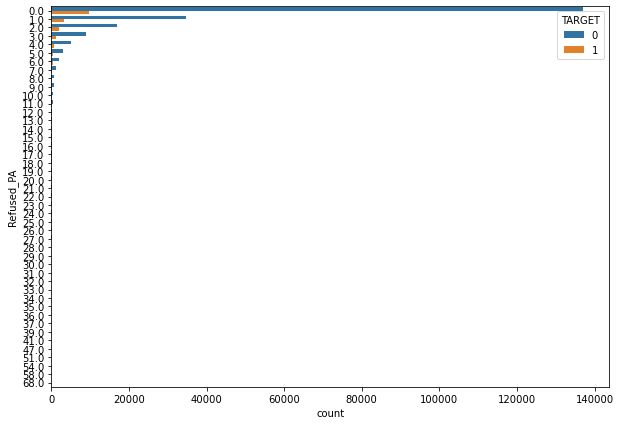

In [31]:
plt.figure(figsize=(10,7))
sns.countplot(y=data['Refused_PA'],hue=data['TARGET'])